## Problem Statement:
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

##### Prediction :   Making two prediction  1) Fuel Type   2) capacity_mw

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading Dataset
df =pd.read_csv("/Users/RahulK/Desktop/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Shape of our dataset is : ",df.shape)

Shape of our dataset is :  (907, 27)


### About Dataset :
The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

In [7]:
pd.set_option('display.max_rows',None)

In [8]:
#Analysing Datatypes in our dataset and Checking for null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [9]:
missing_features=[features for features in df.columns if df[features].isnull().sum()>1]
missing_features

['latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [10]:
for feature in missing_features:
    print(feature,np.round(df[feature].isnull().mean(),4),'% missing values')

latitude 0.0507 % missing values
longitude 0.0507 % missing values
other_fuel1 0.7817 % missing values
other_fuel2 0.9989 % missing values
other_fuel3 1.0 % missing values
commissioning_year 0.419 % missing values
owner 0.6229 % missing values
geolocation_source 0.0209 % missing values
wepp_id 1.0 % missing values
year_of_capacity_data 0.4278 % missing values
generation_gwh_2013 1.0 % missing values
generation_gwh_2014 0.5612 % missing values
generation_gwh_2015 0.5347 % missing values
generation_gwh_2016 0.5215 % missing values
generation_gwh_2017 0.5149 % missing values
generation_gwh_2018 0.5061 % missing values
generation_gwh_2019 1.0 % missing values
generation_data_source 0.505 % missing values
estimated_generation_gwh 1.0 % missing values


In [11]:
#Checking for null Values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Some columns have null values

In [13]:
#Checking for Duplicate Values
df.duplicated().sum()

0

<Axes: >

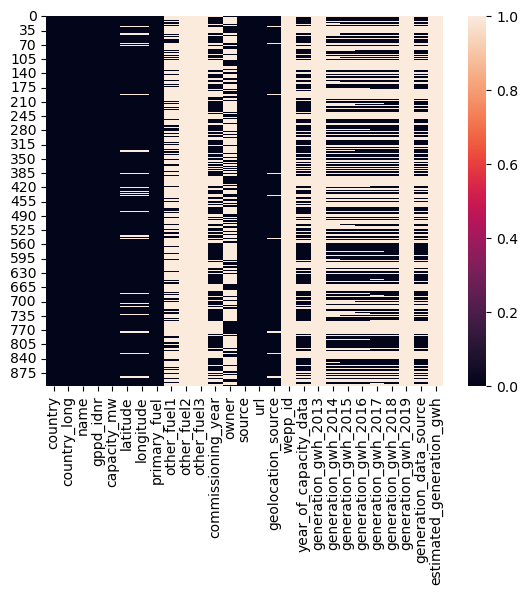

In [14]:
sns.heatmap(df.isnull())

The above outcome helps to visualize null values.

In [16]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Number Of Numeric Features=',len(numeric_features))
numeric_features

Number Of Numeric Features= 15


['capacity_mw',
 'latitude',
 'longitude',
 'other_fuel3',
 'commissioning_year',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'estimated_generation_gwh']

In [17]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('Number Of Categorical Features=',len(categorical_features))
categorical_features

Number Of Categorical Features= 12


['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

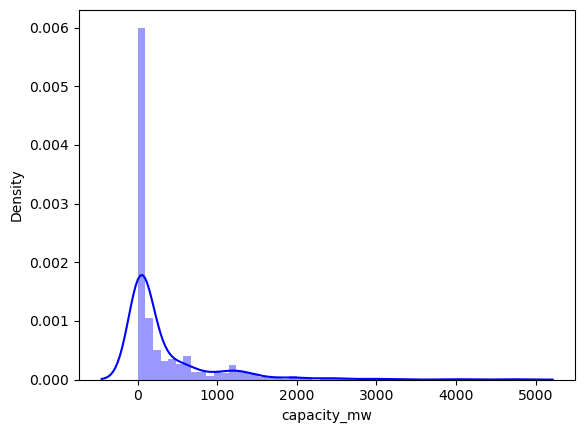

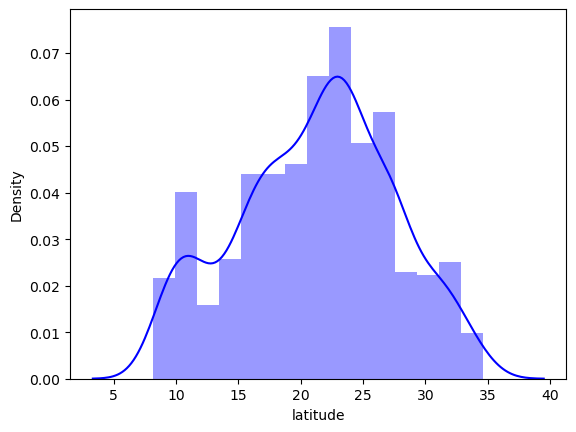

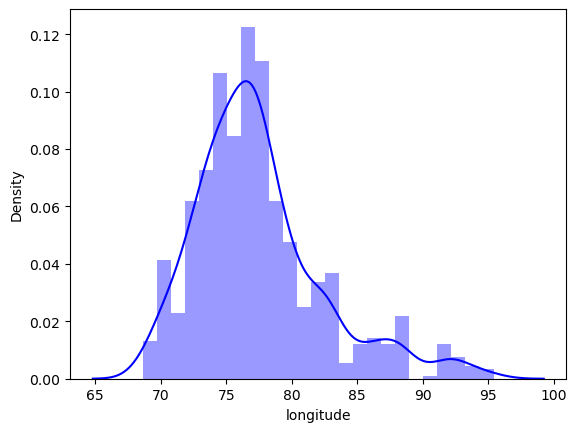

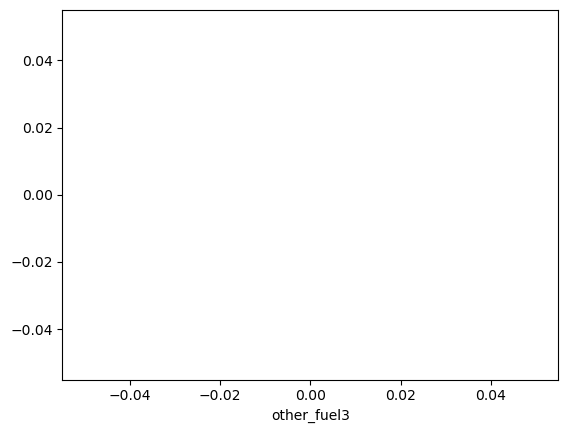

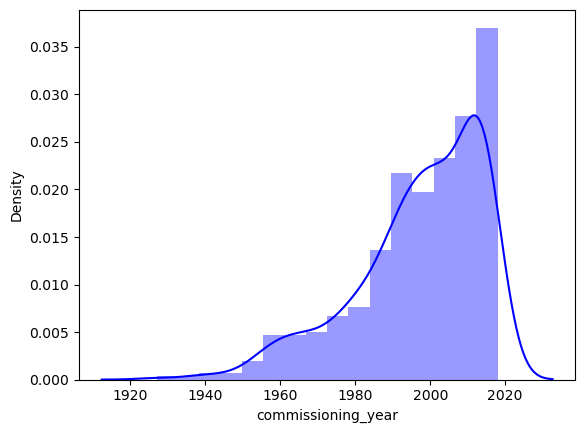

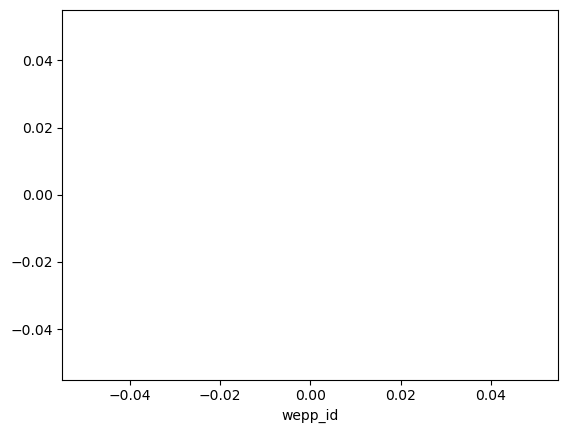

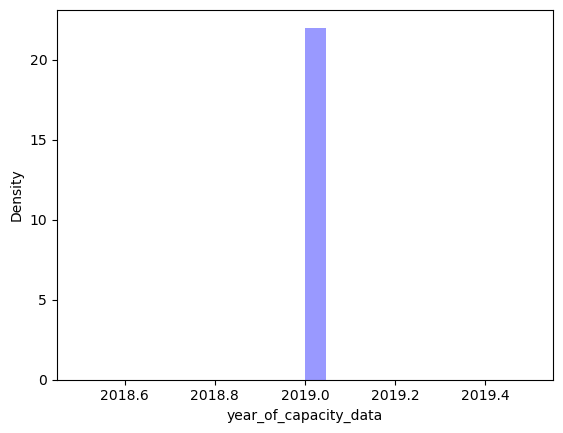

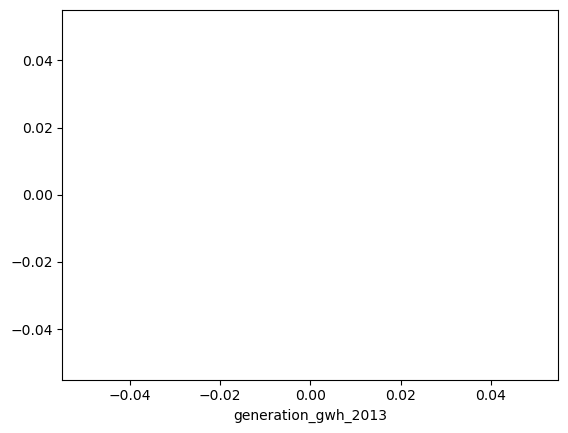

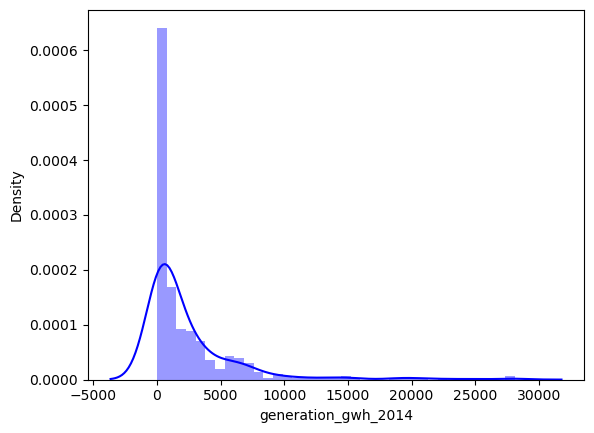

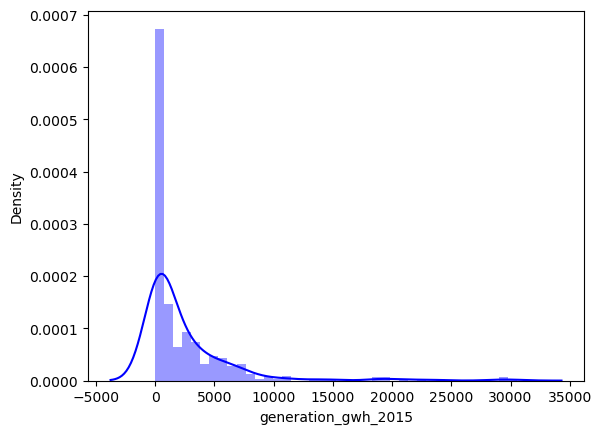

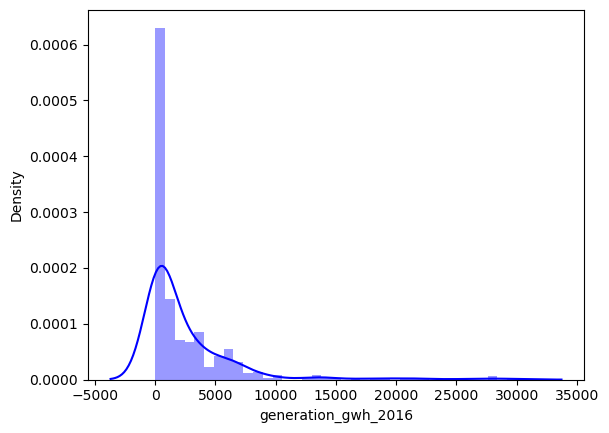

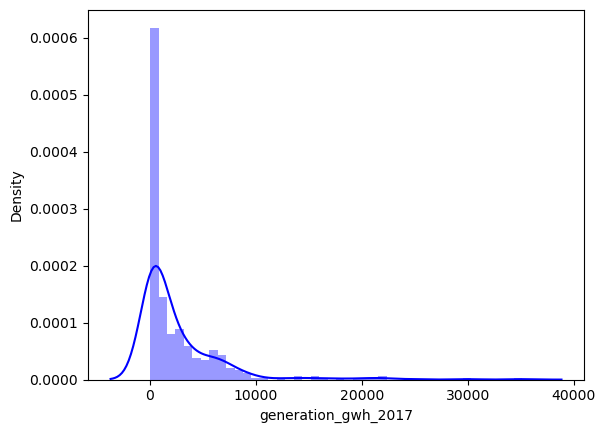

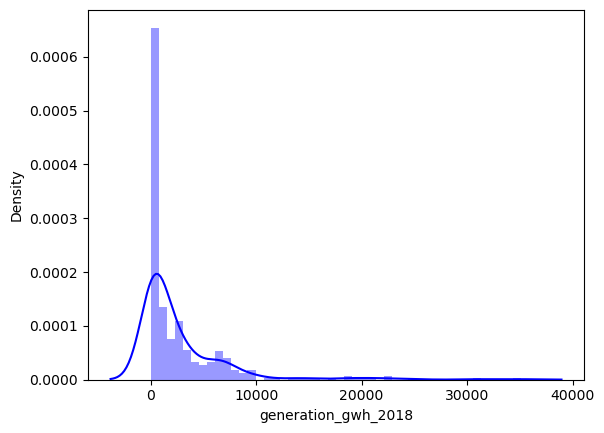

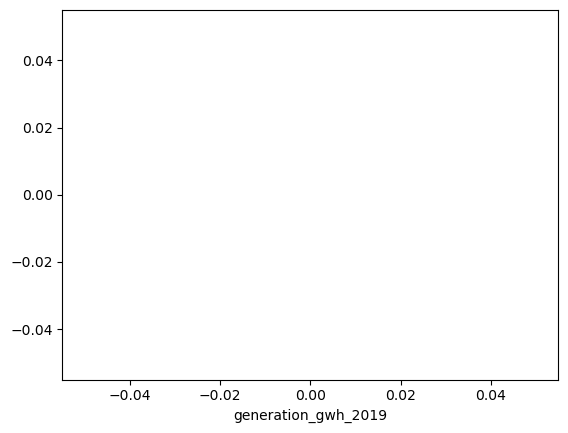

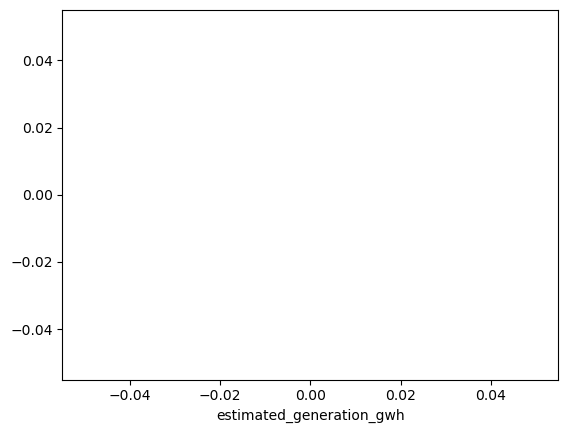

In [18]:
for i in numeric_features:
    plt.figure()
    sns.distplot(df[i],color='blue')

In [19]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

<Axes: xlabel='country_long', ylabel='count'>

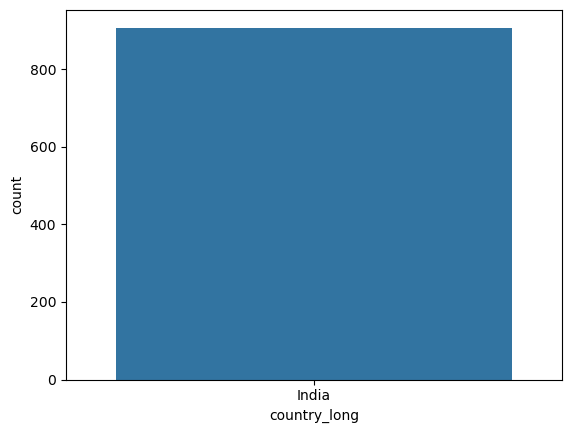

In [21]:
sns.countplot(x='country_long', data=df)

<Axes: xlabel='primary_fuel', ylabel='count'>

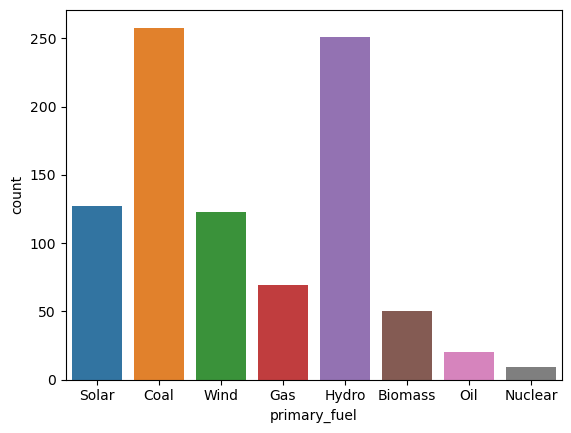

In [23]:
sns.countplot(x='primary_fuel', data=df)

<Axes: xlabel='other_fuel1', ylabel='count'>

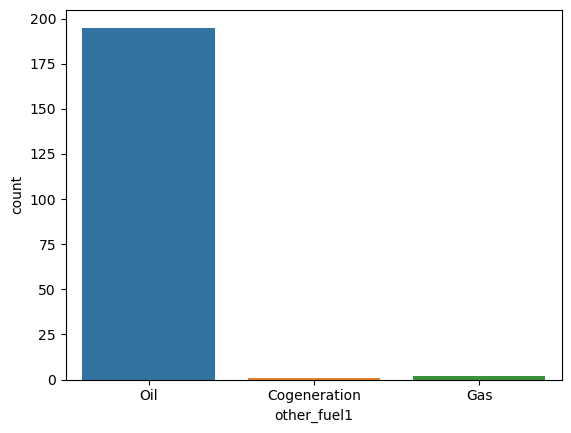

In [24]:
sns.countplot(x='other_fuel1',data=df)

<Axes: xlabel='other_fuel2', ylabel='count'>

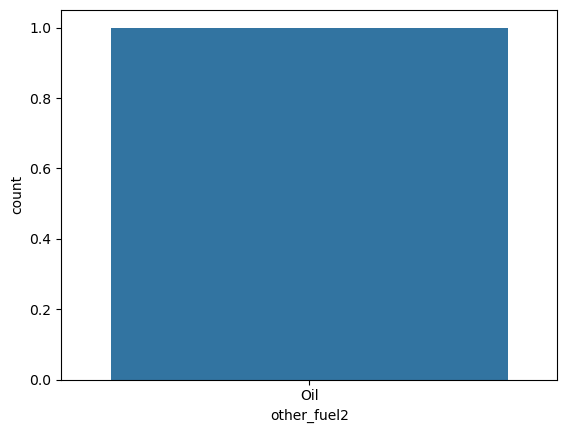

In [25]:
sns.countplot(x='other_fuel2',data=df)

<Axes: xlabel='generation_data_source', ylabel='count'>

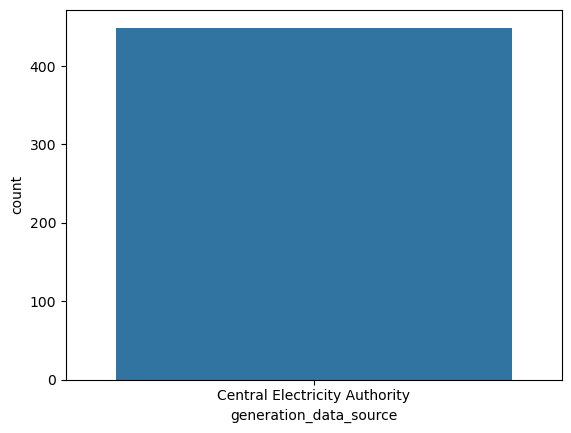

In [26]:
sns.countplot(x='generation_data_source',data = df)

<Axes: xlabel='geolocation_source', ylabel='count'>

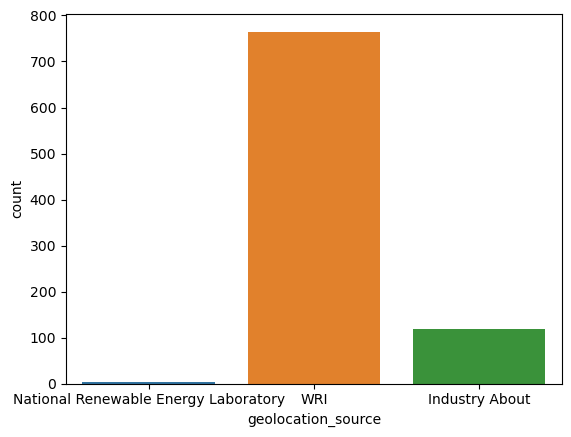

In [27]:
sns.countplot(x='geolocation_source',data=df)

<Axes: xlabel='country', ylabel='count'>

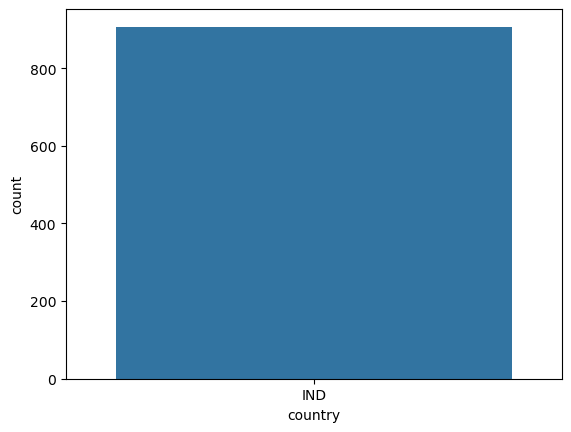

In [29]:
sns.countplot(x='country',data=df)

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)

In [32]:
df['longitude'].fillna(df['longitude'].mean(),inplace=True)

In [33]:
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0],inplace=True)

In [34]:
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0],inplace=True)

In [35]:
df['owner'].fillna(df['owner'].mode()[0],inplace=True)

In [36]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [37]:
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(),inplace=True)

In [38]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(),inplace=True)

In [39]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(),inplace=True)

In [40]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(),inplace=True)

In [41]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(),inplace=True)

In [42]:
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(),inplace=True)

In [43]:
df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].mean(),inplace=True)

In [44]:
df['wepp_id'].fillna(df['wepp_id'].mode(),inplace=True)

In [45]:
df['other_fuel2'].fillna(df['other_fuel2'].mode()[0],inplace=True)

In [46]:
df['other_fuel3'].fillna(df['other_fuel3'].mean(),inplace=True)

In [47]:
df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].mean(),inplace=True)

In [48]:
df['generation_data_source'].fillna(df['generation_data_source'].mode(),inplace=True)

In [49]:
#removing unnecessary columns
df = df.drop(columns=['other_fuel3']) 

In [50]:
df = df.drop(columns=['wepp_id']) 

In [51]:
df = df.drop(columns=['estimated_generation_gwh'])

In [52]:
df = df.drop(columns=['country_long'])

In [53]:
df = df.drop(columns=['year_of_capacity_data'])

In [54]:
df = df.drop(columns=['generation_data_source'])

In [55]:
df = df.drop(columns=['gppd_idnr'])

In [56]:
df = df.drop(columns=['other_fuel2'])

In [57]:
df = df.drop(columns=['country'])

In [58]:
df = df.drop(columns=['name'])

In [59]:
df = df.drop(columns=['source'])

In [60]:
df = df.drop(columns=['owner'])

In [61]:
df = df.drop(columns=['url'])

In [63]:
df = df.drop(columns=['generation_gwh_2013'])

In [64]:
df = df.drop(columns=['generation_gwh_2019'])

In [65]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<Axes: >

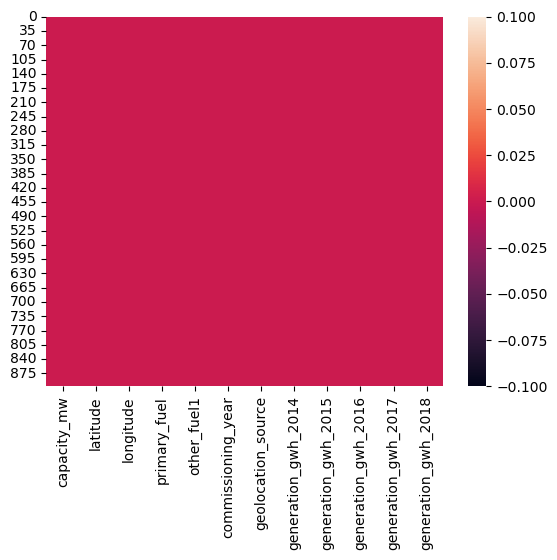

In [66]:
sns.heatmap(df.isnull())

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
list =['capacity_mw','latitude','longitude','primary_fuel','other_fuel1','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']       

In [69]:
lb=LabelEncoder()

In [70]:
for i in list:
    df[i]=lb.fit_transform(df[i])

In [71]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,9,731,143,6,2,65,1,250,265,268,270,272
1,177,594,234,1,2,69,2,250,265,268,270,272
2,121,420,8,7,2,69,2,250,265,268,270,272
3,200,547,806,2,2,58,2,156,196,197,176,174
4,340,423,702,1,2,69,2,272,349,360,339,374


In [72]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,156.358324,413.214994,415.395810,3.206174,1.995590,58.649394,1.733186,216.103638,228.077178,229.901874,230.790518,230.243660
std,107.388592,236.459483,233.652605,2.280652,0.081259,15.511817,0.677151,84.590145,91.502498,94.329154,96.220854,98.892561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.500000,214.500000,216.500000,1.000000,2.000000,52.000000,2.000000,199.500000,200.500000,197.500000,194.500000,188.500000
50%,145.000000,391.000000,429.000000,3.000000,2.000000,68.000000,2.000000,250.000000,265.000000,268.000000,270.000000,272.000000
75%,251.500000,613.500000,608.500000,6.000000,2.000000,69.000000,2.000000,250.000000,265.000000,268.000000,270.000000,272.000000
max,360.000000,836.000000,827.000000,7.000000,2.000000,72.000000,2.000000,371.000000,396.000000,403.000000,408.000000,410.000000


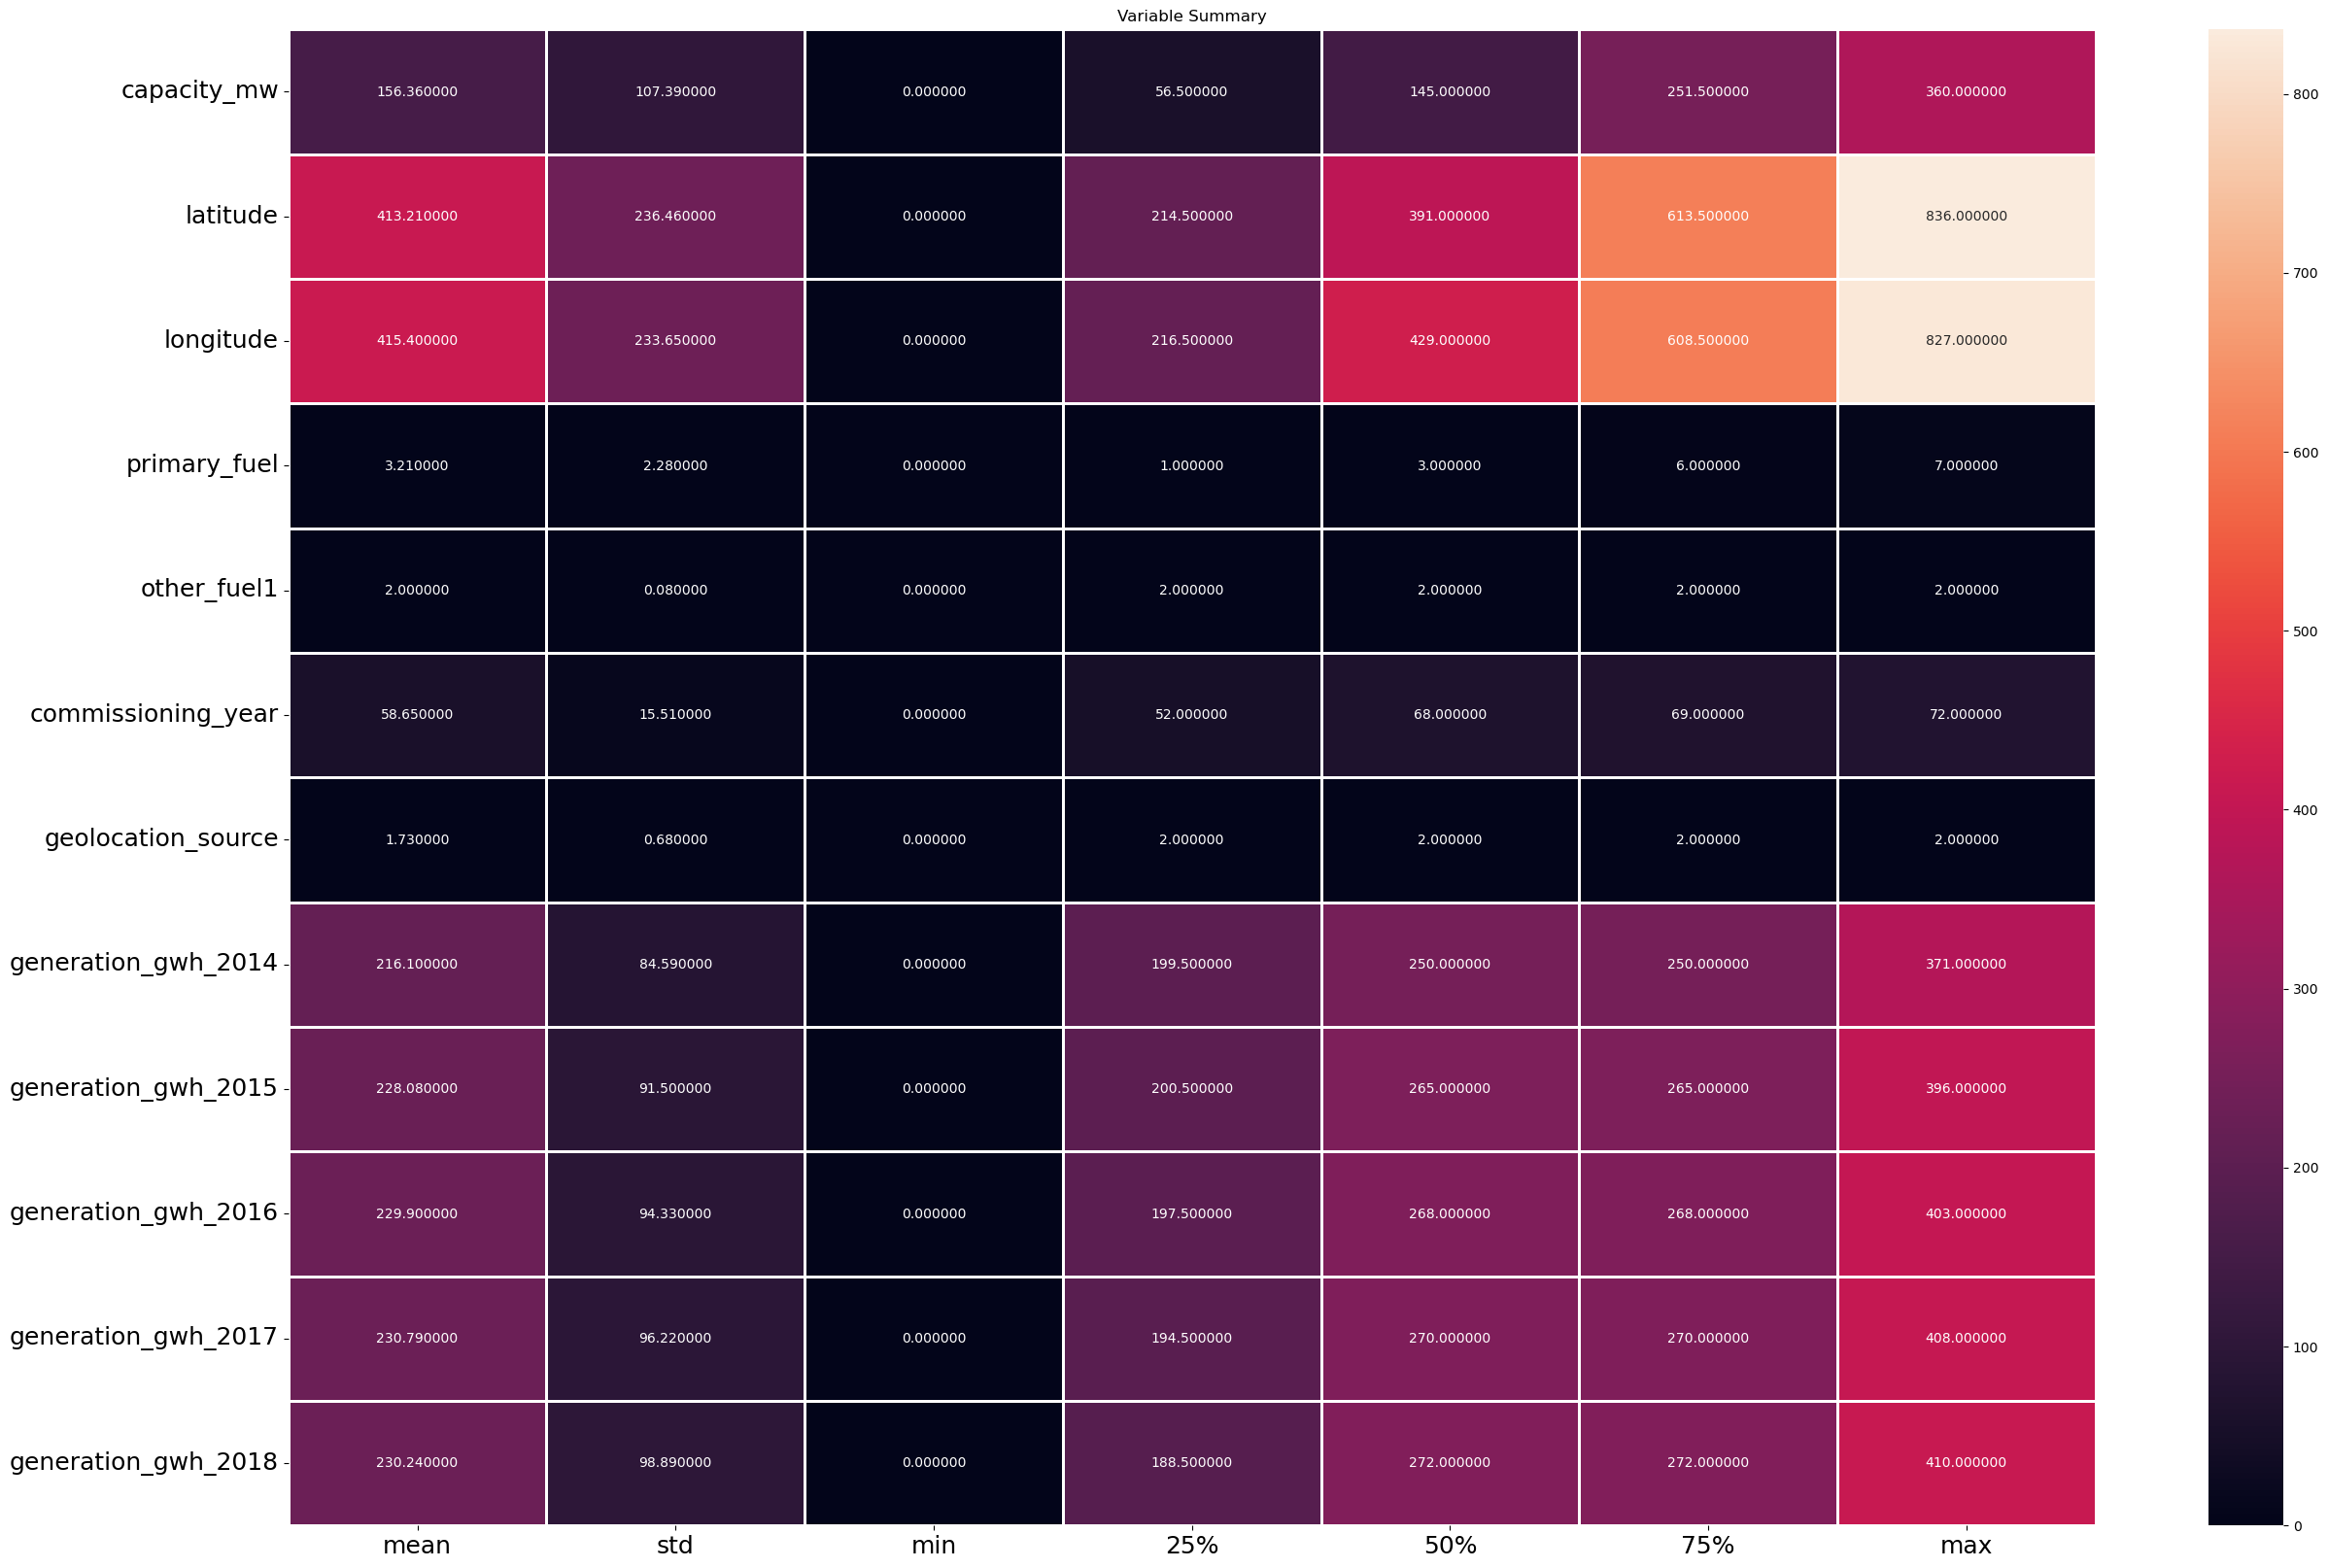

In [73]:
#lets visualize dataset

plt.figure(figsize=(30,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("Variable Summary")
plt.show()

In [74]:
corr=df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.078279,0.344733,-0.515472,-0.040041,-0.136965,0.423657,-0.006148,-0.011158,0.009683,0.012681,-0.000765
latitude,0.078279,1.000000,-0.044093,0.011613,0.044511,0.025215,-0.211405,0.066206,0.059281,0.085754,0.048666,0.050687
longitude,0.344733,-0.044093,1.000000,-0.384534,0.036368,-0.171606,0.304849,-0.127436,-0.142959,-0.091117,-0.111920,-0.118664
primary_fuel,-0.515472,0.011613,-0.384534,1.000000,0.004912,0.166998,-0.483217,0.058498,0.054835,0.041565,0.054588,0.055503
other_fuel1,-0.040041,0.044511,0.036368,0.004912,1.000000,0.057441,-0.021408,0.034751,0.057197,0.063014,0.026986,0.067711
commissioning_year,-0.136965,0.025215,-0.171606,0.166998,0.057441,1.000000,-0.262266,0.333011,0.324561,0.356498,0.326305,0.328480
geolocation_source,0.423657,-0.211405,0.304849,-0.483217,-0.021408,-0.262266,1.000000,-0.158065,-0.159171,-0.159316,-0.160740,-0.166556
generation_gwh_2014,-0.006148,0.066206,-0.127436,0.058498,0.034751,0.333011,-0.158065,1.000000,0.856488,0.831844,0.765011,0.784598
generation_gwh_2015,-0.011158,0.059281,-0.142959,0.054835,0.057197,0.324561,-0.159171,0.856488,1.000000,0.901426,0.799142,0.815764
generation_gwh_2016,0.009683,0.085754,-0.091117,0.041565,0.063014,0.356498,-0.159316,0.831844,0.901426,1.000000,0.888052,0.896766


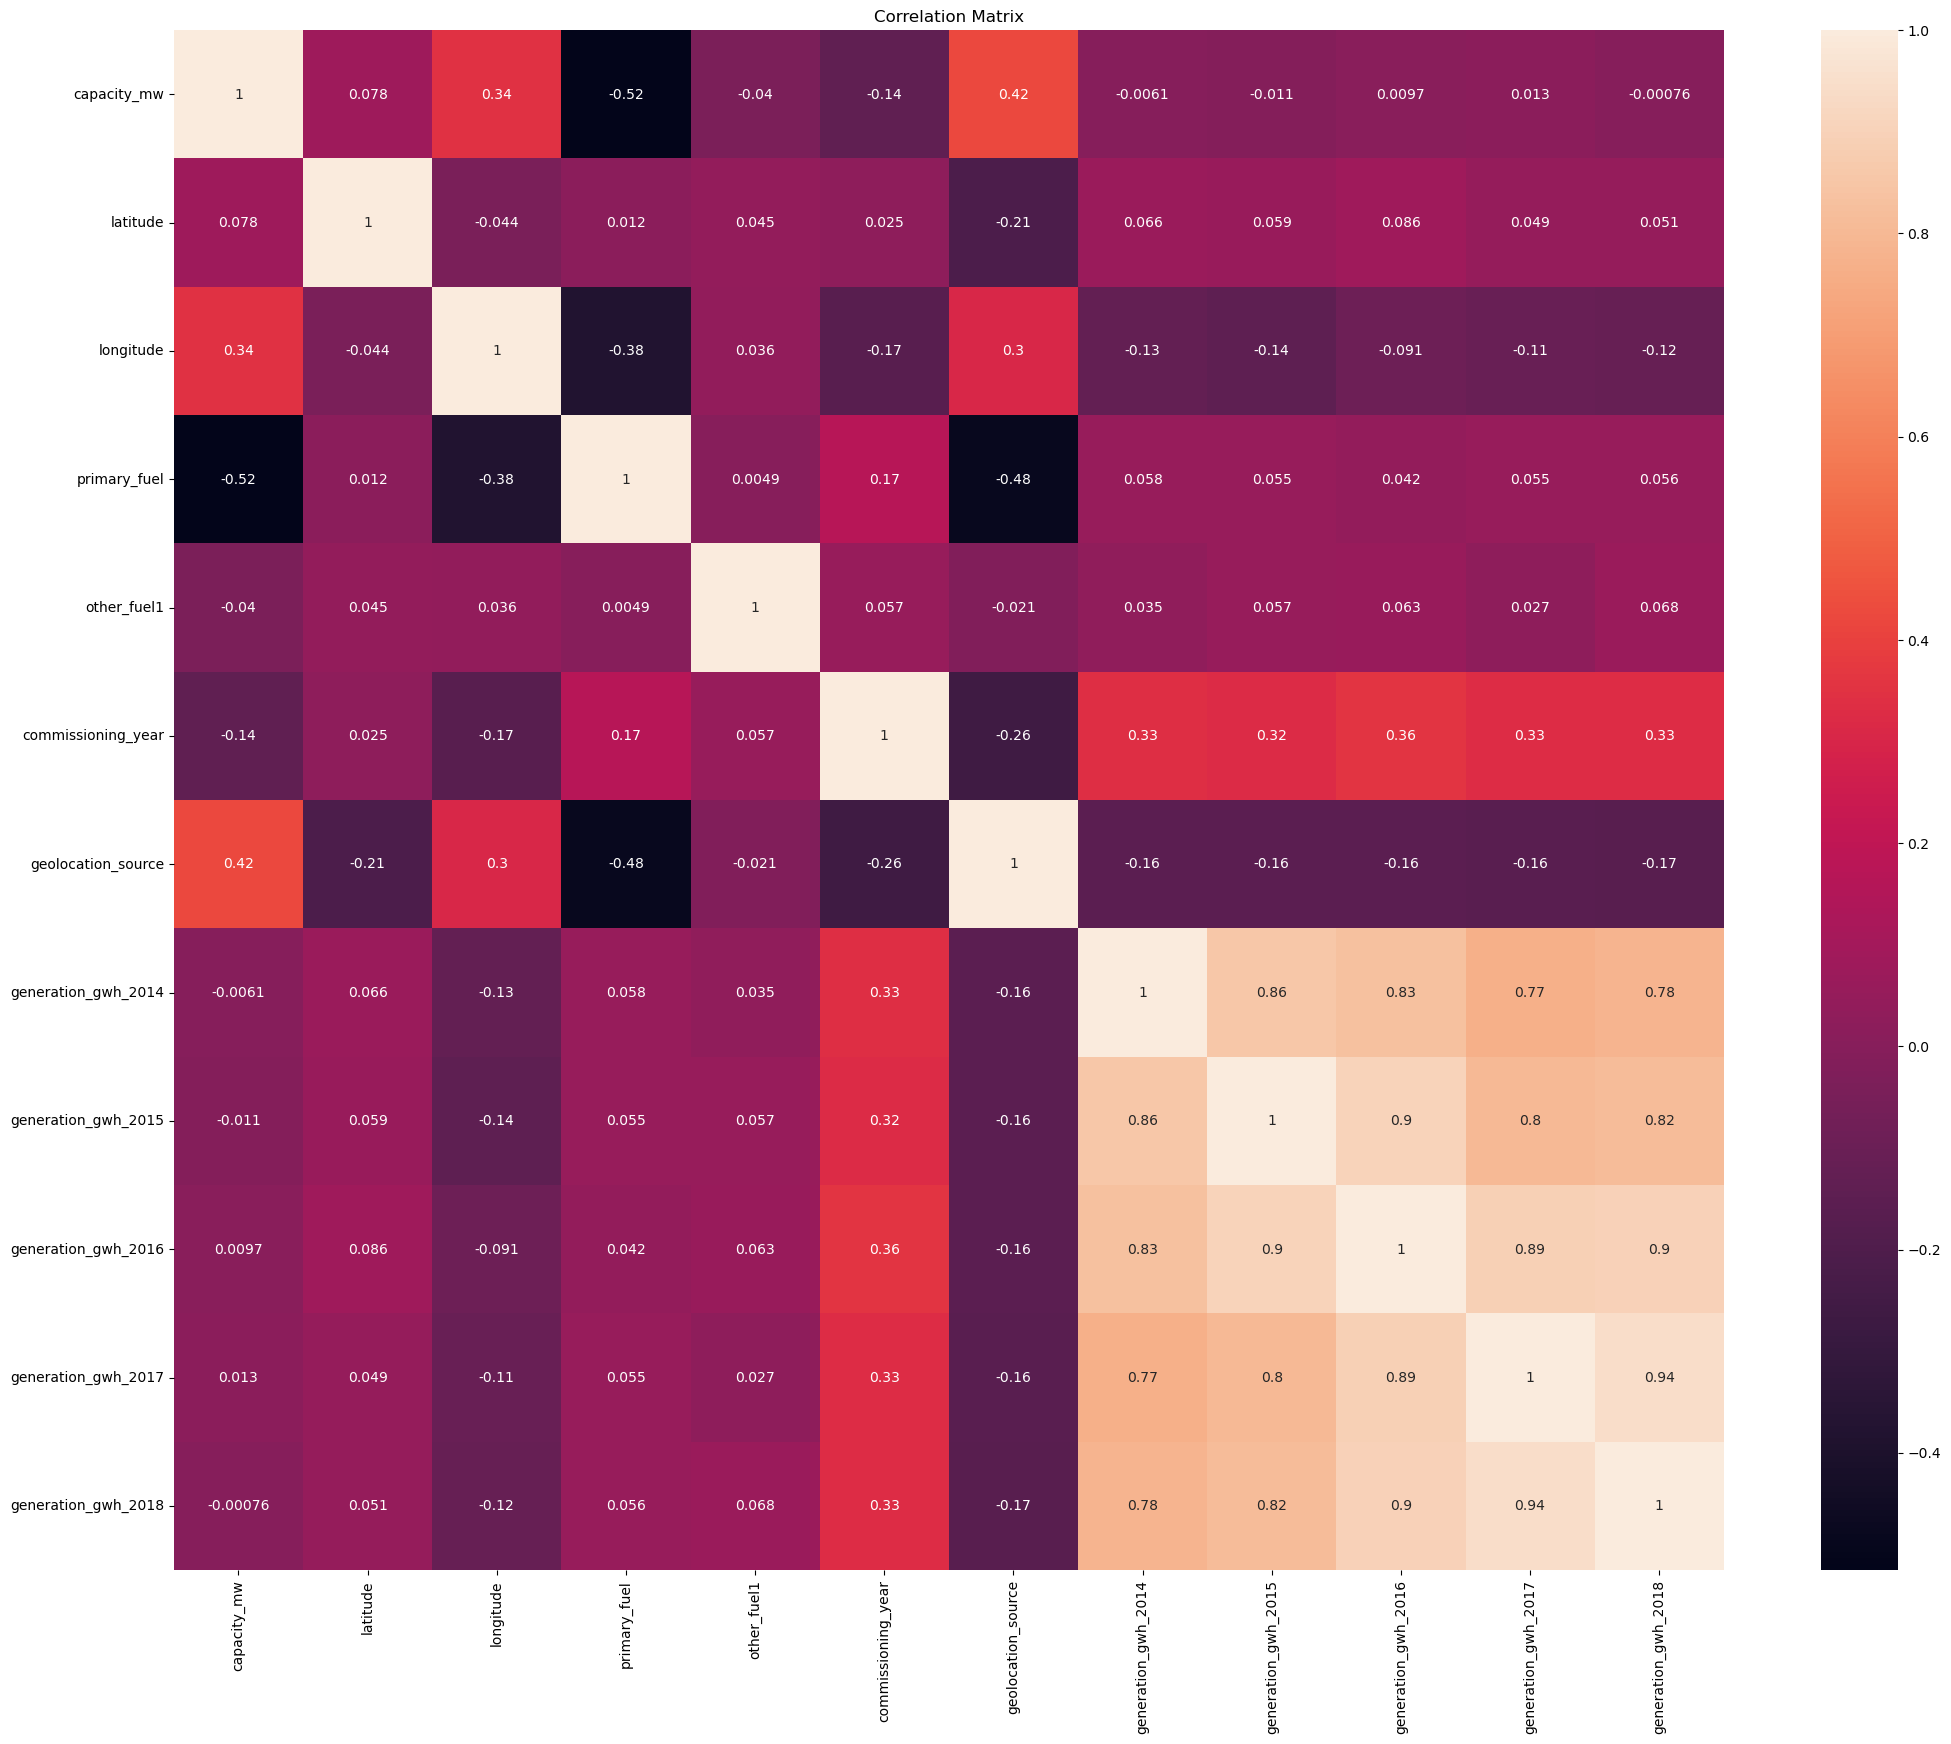

In [75]:
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [78]:
valcal()

    vif factor             features
0     4.774632          capacity_mw
1     4.468409             latitude
2     5.316946            longitude
3     4.708530         primary_fuel
4    52.839517          other_fuel1
5    18.581295   commissioning_year
6    11.571233   geolocation_source
7    31.364874  generation_gwh_2014
8    49.036244  generation_gwh_2015
9    70.773686  generation_gwh_2016
10   67.946377  generation_gwh_2017
11   70.864813  generation_gwh_2018


In [79]:
df.shape

(907, 12)

capacity_mw               Axes(0.125,0.798085;0.110714x0.0819149)
latitude               Axes(0.257857,0.798085;0.110714x0.0819149)
longitude              Axes(0.390714,0.798085;0.110714x0.0819149)
primary_fuel           Axes(0.523571,0.798085;0.110714x0.0819149)
other_fuel1            Axes(0.656429,0.798085;0.110714x0.0819149)
commissioning_year     Axes(0.789286,0.798085;0.110714x0.0819149)
geolocation_source        Axes(0.125,0.699787;0.110714x0.0819149)
generation_gwh_2014    Axes(0.257857,0.699787;0.110714x0.0819149)
generation_gwh_2015    Axes(0.390714,0.699787;0.110714x0.0819149)
generation_gwh_2016    Axes(0.523571,0.699787;0.110714x0.0819149)
generation_gwh_2017    Axes(0.656429,0.699787;0.110714x0.0819149)
generation_gwh_2018    Axes(0.789286,0.699787;0.110714x0.0819149)
dtype: object

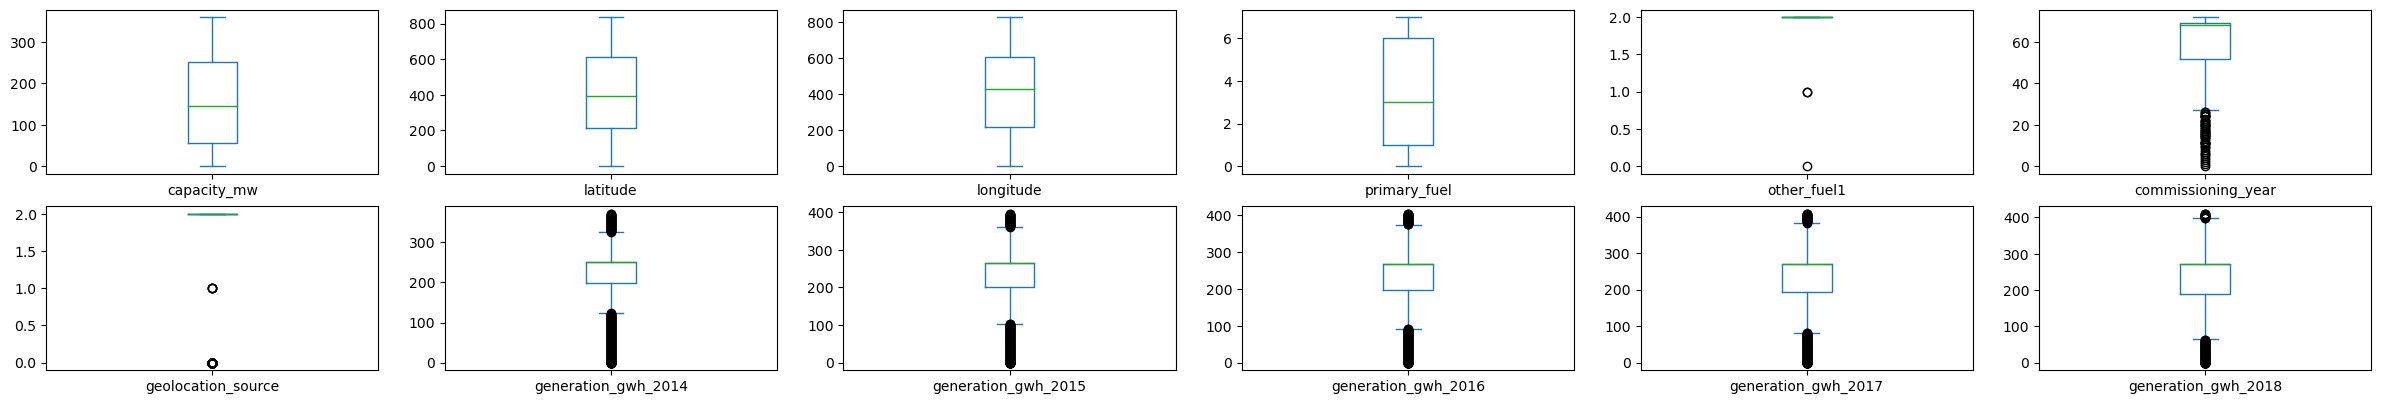

In [80]:
df.plot(kind='box',subplots =True, layout=(8,6),figsize=(30,20))

In [81]:
from scipy.stats import zscore 

In [82]:
z=np.abs(zscore(df))

In [83]:
threshold=3
print(np.where(z>3))

(array([222, 342, 371, 444, 454, 478, 484, 538, 541, 573, 583, 592, 601,
       621, 706, 709, 728, 807, 811, 813, 817, 848]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5]))


In [84]:
df_new=df[(z<3).all(axis=1)]

In [85]:
df_new.shape

(885, 12)

In [88]:
loss_of_data=(907-886)/907*100
loss_of_data

2.3153252480705624

In [89]:
df=df_new

In [90]:
df.skew()

capacity_mw            0.226889
latitude               0.030787
longitude             -0.030446
primary_fuel           0.464517
other_fuel1            0.000000
commissioning_year    -1.501435
geolocation_source    -2.118329
generation_gwh_2014   -1.239397
generation_gwh_2015   -1.141462
generation_gwh_2016   -1.083332
generation_gwh_2017   -1.048587
generation_gwh_2018   -1.030506
dtype: float64

In [91]:
#splitting dataset into x and y.

x=df.drop(['primary_fuel','capacity_mw'],axis=1)

In [92]:
y=df['primary_fuel']

In [93]:
x.head()

,latitude,longitude,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,731,143,2,65,1,250,265,268,270,272
1,594,234,2,69,2,250,265,268,270,272
2,420,8,2,69,2,250,265,268,270,272
3,547,806,2,58,2,156,196,197,176,174
4,423,702,2,69,2,272,349,360,339,374


In [94]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int64

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
std=StandardScaler()

In [97]:
X=std.fit_transform(x)

In [98]:
x=X

In [99]:
x.shape

(885, 10)

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split

In [101]:
ln=LinearRegression() 

In [102]:
for i in range(1,1500):
    # Split data into train and test. Model will be built on training data and tested on test data
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    ln.fit(x_train,y_train)
    predtest=ln.predict(x_test)
    predtrain=ln.predict(x_train)
    if round(r2_score(y_train,predtrain)*100,2)==round(r2_score(y_test,predtest)*100,2):
        print('At random state',i,'score is best')
        print('Train score',r2_score(y_train,predtrain)*100)
        print('Test Score',r2_score(y_test,predtest)*100)

At random state 1229 score is best
Train score 30.589536922517425
Test Score 30.58696795227419
At random state 1493 score is best
Train score 30.73994036171258
Test Score 30.736721806094046


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12721,test_size=0.20)

In [104]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [105]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [106]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [107]:
fun(ln)

Taining Score:- 30.710229991742455
Mean Absolute Error 1.506596833460271
Mean Squared Error 3.9566682818861802
Root Mean Squared Erro 1.9891375723881393
R2 Score 29.84330537262737


In [108]:
fun(svr)

Taining Score:- 41.23080992874431
Mean Absolute Error 1.2390686810096354
Mean Squared Error 3.6821965632062956
Root Mean Squared Erro 1.9189050427799432
R2 Score 34.71003343255341


In [109]:
fun(svrl)

Taining Score:- 8.869115757424971
Mean Absolute Error 1.4634522418330287
Mean Squared Error 5.571613969348179
Root Mean Squared Erro 2.3604266498555253
R2 Score 1.2082914257283583


In [110]:
fun(svrp)

Taining Score:- 32.89279204425094
Mean Absolute Error 1.405596466362955
Mean Squared Error 4.157389592329796
Root Mean Squared Erro 2.038967776187205
R2 Score 26.28426461440494


In [111]:
fun(dtc)

Taining Score:- 99.9747974541157
Mean Absolute Error 0.8595641646489104
Mean Squared Error 3.8983627349244783
Root Mean Squared Erro 1.9744271915987377
R2 Score 30.87713589918445


In [112]:
fun(knn)

Taining Score:- 74.8314193929264
Mean Absolute Error 0.7887005649717516
Mean Squared Error 2.0415819209039547
Root Mean Squared Erro 1.428839361476284
R2 Score 63.80019016571583


In [113]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [114]:
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

In [115]:
fun(rfr)

Taining Score:- 94.88615586111816
Mean Absolute Error 0.7413745591315857
Mean Squared Error 2.0329337014368436
Root Mean Squared Erro 1.4258098405596882
R2 Score 63.9535339511937


In [116]:
fun(adr)

Taining Score:- 52.99251897127101
Mean Absolute Error 1.260376796106613
Mean Squared Error 3.1730111365577502
Root Mean Squared Erro 1.7812947921547826
R2 Score 43.738530122465725


In [117]:
fun(gbr)

Taining Score:- 74.89707851737306
Mean Absolute Error 1.096569960551289
Mean Squared Error 2.815559605477474
Root Mean Squared Erro 1.6779629332847237
R2 Score 50.076594403692496


In [118]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [119]:
ls=Lasso()
rd=Ridge()
es=ElasticNet()

In [120]:
fun(ls)

Taining Score:- 2.9401717465894373
Mean Absolute Error 1.962660288005427
Mean Squared Error 5.577432589721636
Root Mean Squared Erro 2.361658863960169
R2 Score 1.1051199835930392


In [121]:
fun(rd)

Taining Score:- 30.710151499038552
Mean Absolute Error 1.5064133015487084
Mean Squared Error 3.956306362226068
Root Mean Squared Erro 1.9890465962933266
R2 Score 29.849722662444268


In [122]:
fun(es)

Taining Score:- 16.98598901230618
Mean Absolute Error 1.7603094023081487
Mean Squared Error 4.72529806994479
Root Mean Squared Erro 2.173775073448214
R2 Score 16.21453452792475


In [125]:
param1={'criterion':['mse','absolute_error','possion'],'n_estimators':[10,50,75,100,200,250,500],'max_features':['auto','log2','sqrt'],'bootstrap':[True,False]}

In [132]:
param1 = {
    'criterion': ['squared_error'],
    'n_estimators': [10, 50, 75, 100, 200, 250, 500],
    'max_features': ['auto', 'log2', 'sqrt'],
    'bootstrap': [True, False]
}

In [133]:
gd=GridSearchCV(rfr,param1)
gd.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 50, 75, 100, 200, 250, 500]})

In [136]:
rfr1=RandomForestRegressor(criterion='squared_error',n_estimators=500,max_features='log2',bootstrap=True)

In [137]:
fun(rfr1)

Taining Score:- 95.4892194689976
Mean Absolute Error 0.7101331658364557
Mean Squared Error 1.7698068759839714
Root Mean Squared Erro 1.3303408871353128
R2 Score 68.61910281530051


In [138]:
param_knn={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [139]:
gd_kn=GridSearchCV(knn,param_knn)

In [140]:
gd_kn.fit(x,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [141]:
print(gd_kn.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [142]:
knn1=KNeighborsRegressor(n_neighbors=5,algorithm='auto',p=2,weights='uniform')

In [143]:
fun(knn1)

Taining Score:- 74.8314193929264
Mean Absolute Error 0.7887005649717516
Mean Squared Error 2.0415819209039547
Root Mean Squared Erro 1.428839361476284
R2 Score 63.80019016571583


In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
for i in range(2,10):
    score=cross_val_score(rfr1,x,y,cv=i)
    print("At the CV=",i,'Score=',score.mean())

At the CV= 2 Score= 0.6155095292784846
At the CV= 3 Score= 0.6560919044259577
At the CV= 4 Score= 0.6794750003857895
At the CV= 5 Score= 0.691448052933706
At the CV= 6 Score= 0.668042742588924
At the CV= 7 Score= 0.651140418436498
At the CV= 8 Score= 0.6713853259781988
At the CV= 9 Score= 0.6632677365267748


In [146]:
score=cross_val_score(svr,x,y,cv=10)
print(score.mean())

0.29646270760915283


In [147]:
score=cross_val_score(svrl,x,y,cv=10)
print(score.mean())

0.07601335418586881


In [148]:
score=cross_val_score(svrp,x,y,cv=10)
print(score.mean())

0.2549225446195295


In [149]:
score=cross_val_score(dtc,x,y,cv=10)
print(score.mean())

0.30425016929921206


In [150]:
score=cross_val_score(ln,x,y,cv=10)
print(score.mean())

0.24897418379648723


In [151]:
score=cross_val_score(knn,x,y,cv=10)
print(score.mean())

0.5554743392030413


In [152]:
score=cross_val_score(knn1,x,y,cv=10)
print(score.mean())

0.5554743392030413


In [194]:
import pickle
filename='GlobalPowerPlantAnalysis.pkl'
pickle.dump(rfr1,open(filename,'wb'))

     Actual   Predict
855       3  3.032000
863       7  6.992000
488       3  2.802000
314       3  2.964000
571       1  2.120000
152       0  1.310000
38        6  6.000000
846       3  2.864000
260       0  1.684943
479       3  3.000000
276       7  4.212000
89        1  1.142000
502       6  5.982954
384       3  2.858000
23        1  1.556000
551       6  5.720000
145       3  3.128000
306       3  2.868000
741       3  3.000000
22        2  2.052000
106       2  3.538000
293       2  2.250000
731       3  3.000000
130       6  6.042000
666       6  6.000000
158       1  1.550000
54        3  2.794000
682       1  2.408000
266       7  6.980000
648       1  1.000000
680       3  1.940776
370       3  2.352000
14        3  3.000000
348       3  2.962000
775       7  6.931220
24        1  1.000000
136       3  2.708000
659       6  5.982000
357       0  1.418000
245       6  5.712000
157       1  1.864000
359       2  1.586000
386       6  5.461969
673       7  7.000000
643       

Text(0.5, 1.0, 'RIDGE Regressor')

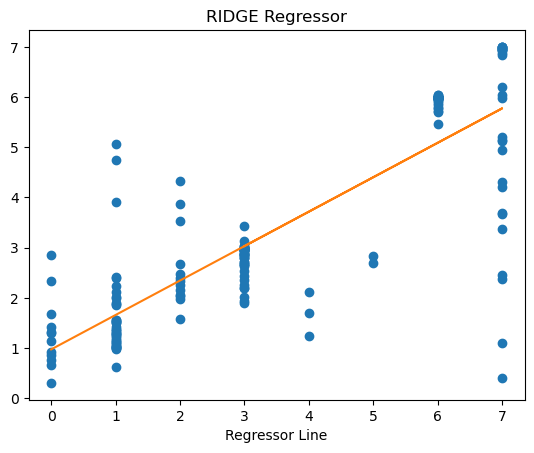

In [195]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfr1.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(rfr1.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('RIDGE Regressor')

## Consider Target Variable as capacity_mw Consider Regressior Problem.

In [196]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,9,731,143,6,2,65,1,250,265,268,270,272
1,177,594,234,1,2,69,2,250,265,268,270,272
2,121,420,8,7,2,69,2,250,265,268,270,272
3,200,547,806,2,2,58,2,156,196,197,176,174
4,340,423,702,1,2,69,2,272,349,360,339,374
5,232,540,0,1,2,59,2,194,221,211,207,198
6,146,51,430,3,2,24,2,54,67,30,39,16
7,217,809,459,3,2,64,2,160,185,180,177,161
8,238,179,338,3,2,58,2,130,66,144,141,129
9,223,489,679,1,2,62,2,235,239,225,234,227


In [197]:
#splitting dataset into x and y.

x1=df.drop(['primary_fuel','capacity_mw'],axis=1)

In [198]:
x1.head()

,latitude,longitude,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,731,143,2,65,1,250,265,268,270,272
1,594,234,2,69,2,250,265,268,270,272
2,420,8,2,69,2,250,265,268,270,272
3,547,806,2,58,2,156,196,197,176,174
4,423,702,2,69,2,272,349,360,339,374


In [199]:
y1=df['capacity_mw']

In [200]:
y1.head()

0      9
1    177
2    121
3    200
4    340
Name: capacity_mw, dtype: int64

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
std=StandardScaler()

In [203]:
X1=std.fit_transform(x1)

In [204]:
x1=X1

In [205]:
x1.shape

(885, 10)

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split

In [207]:
ln1=LinearRegression()

In [208]:
for i in range(1,3000):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    ln1.fit(x1_train,y1_train)
    predtest=ln.predict(x1_test)
    predtrain=ln.predict(x1_train)
    if round(r2_score(y1_train,predtrain)*100,2)==round(r2_score(y1_test,predtest)*100,2):
        print('At random state',i,'score is best')
        print('Train score',r2_score(y1_train,predtrain)*100)
        print('Test Score',r2_score(y1_test,predtest)*100)

In [209]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=12721,test_size=0.20)

In [210]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.model_selection import GridSearchCV

In [211]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [175]:
def fun1(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Taining Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [212]:
fun1(ln1)

Taining Score:- 30.710229991742455
Mean Absolute Error 1.506596833460271
Mean Squared Error 3.9566682818861802
Root Mean Squared Erro 1.9891375723881393
R2 Score 29.84330537262737


In [213]:
fun1(svr)

Taining Score:- 41.23080992874431
Mean Absolute Error 1.2390686810096354
Mean Squared Error 3.6821965632062956
Root Mean Squared Erro 1.9189050427799432
R2 Score 34.71003343255341


In [214]:
fun1(svrl)

Taining Score:- 8.869115757424971
Mean Absolute Error 1.4634522418330287
Mean Squared Error 5.571613969348179
Root Mean Squared Erro 2.3604266498555253
R2 Score 1.2082914257283583


In [215]:
fun1(svrp)

Taining Score:- 32.89279204425094
Mean Absolute Error 1.405596466362955
Mean Squared Error 4.157389592329796
Root Mean Squared Erro 2.038967776187205
R2 Score 26.28426461440494


In [216]:
fun1(dtc)

Taining Score:- 99.9747974541157
Mean Absolute Error 0.8482647296206618
Mean Squared Error 3.8644644298397326
Root Mean Squared Erro 1.9658241095885798
R2 Score 31.478195393886978


In [217]:
fun1(knn)

Taining Score:- 74.8314193929264
Mean Absolute Error 0.7887005649717516
Mean Squared Error 2.0415819209039547
Root Mean Squared Erro 1.428839361476284
R2 Score 63.80019016571583


In [218]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor 

In [219]:
rfc=RandomForestRegressor()
ad=AdaBoostRegressor()
gb=GradientBoostingRegressor()

In [220]:
fun1(rfc)

Taining Score:- 94.98814752390876
Mean Absolute Error 0.7470000642678333
Mean Squared Error 2.1002423237021133
Root Mean Squared Erro 1.449221281827628
R2 Score 62.76006759980106


In [221]:
fun1(ad)

Taining Score:- 57.675427237655775
Mean Absolute Error 1.1991802271567658
Mean Squared Error 3.2335156633103956
Root Mean Squared Erro 1.7981978932560219
R2 Score 42.66570892428949


In [222]:
fun1(gb)

Taining Score:- 74.89707851737306
Mean Absolute Error 1.0980435373141821
Mean Squared Error 2.8158637208617097
Root Mean Squared Erro 1.6780535512496941
R2 Score 50.0712020562367


In [223]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet 

In [224]:
lso=Lasso()
rid=Ridge()
est=ElasticNet()

In [225]:
fun1(lso)

Taining Score:- 2.9401717465894373
Mean Absolute Error 1.962660288005427
Mean Squared Error 5.577432589721636
Root Mean Squared Erro 2.361658863960169
R2 Score 1.1051199835930392


In [226]:
fun1(rid)

Taining Score:- 30.710151499038552
Mean Absolute Error 1.5064133015487084
Mean Squared Error 3.956306362226068
Root Mean Squared Erro 1.9890465962933266
R2 Score 29.849722662444268


In [227]:
fun1(est)

Taining Score:- 16.98598901230618
Mean Absolute Error 1.7603094023081487
Mean Squared Error 4.72529806994479
Root Mean Squared Erro 2.173775073448214
R2 Score 16.21453452792475


In [228]:
parm1={'criterion':['squared_error'],'n_estimators':[10,50,75,100,200,250,500],'max_features':['auto','log2','sqrt'],'bootstrap':[True,False]}

In [229]:
gd=GridSearchCV(rfc,parm1)
gd.fit(x1,y1)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 50, 75, 100, 200, 250, 500]})

In [230]:
print(gd.best_params_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 75}


In [231]:
rfc1=RandomForestRegressor(criterion='squared_error',n_estimators=500,max_features='log2',bootstrap=True)

In [232]:
fun(rfc1)

Taining Score:- 95.50360917746714
Mean Absolute Error 0.723047222613393
Mean Squared Error 1.7879964585264865
Root Mean Squared Erro 1.3371598477842828
R2 Score 68.29657868719082


In [233]:
p1_knn={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [234]:
gd_knn=GridSearchCV(knn,p1_knn)

In [235]:
gd_knn.fit(x1,y1)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [236]:
print(gd.best_params_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 75}


In [237]:
knn1=KNeighborsRegressor(n_neighbors=5,algorithm='auto',p=2,weights='uniform')

In [238]:
fun1(knn1)

Taining Score:- 74.8314193929264
Mean Absolute Error 0.7887005649717516
Mean Squared Error 2.0415819209039547
Root Mean Squared Erro 1.428839361476284
R2 Score 63.80019016571583


In [239]:
from sklearn.model_selection import cross_val_score   #import library

In [240]:
for i in range(2,10):
    score=cross_val_score(rfc1,x1,y1,cv=i)
    print("At the CV=",i,'Score=',score.mean())

At the CV= 2 Score= 0.8143548038349615
At the CV= 3 Score= 0.8232387210901614
At the CV= 4 Score= 0.8342042375462876
At the CV= 5 Score= 0.8355717739186664
At the CV= 6 Score= 0.8300013386338979
At the CV= 7 Score= 0.8288187200420823
At the CV= 8 Score= 0.8357663613494057
At the CV= 9 Score= 0.8321791858682696


In [242]:
score=cross_val_score(svr,x1,y1,cv=10)
print(score.mean())

0.25291695602561703


In [243]:
score=cross_val_score(svrl,x1,y1,cv=10)
print(score.mean())

0.23773895001965642


In [244]:
score=cross_val_score(svrp,x1,y1,cv=10)
print(score.mean())

0.16967419614650145


In [245]:
score=cross_val_score(dtc,x1,y1,cv=10)
print(score.mean())

0.6894414947761922


In [246]:
score=cross_val_score(knn,x1,y1,cv=10)
print(score.mean())

0.6333668866015117


In [247]:
score=cross_val_score(knn1,x1,y1,cv=10)
print(score.mean())

0.6333668866015117


In [248]:
score=cross_val_score(rfc,x1,y1,cv=10)
print(score.mean())

0.8278130156446026


In [249]:
score=cross_val_score(ln1,x1,y1,cv=10)
print(score.mean())

0.2518105993670841


In [250]:
import pickle
filename='Global PowerPlant Prediction Capacity_mw.pkl'
pickle.dump(rfc1,open(filename,'wb'))

     Actual   Predict
855     184  3.046000
863      83  6.926000
488     222  2.804000
314     180  2.960000
571     306  2.182000
152      77  1.356000
38       19  6.000000
846     240  2.830000
260      63  1.821337
479      31  3.000000
276      77  4.359750
89      272  1.130000
502     135  5.871427
384     195  2.902000
23      279  1.588000
551      21  5.706000
145      13  3.132000
306     230  2.892000
741      14  3.000000
22      285  2.084000
106     210  3.534000
293     267  2.254000
731      11  3.000000
130     122  6.046000
666      19  6.000000
158     341  1.660000
54      146  2.778000
682     319  2.450000
266      87  6.918000
648     355  1.000000
680     180  2.075517
370     257  2.326000
14       31  3.000000
348     194  2.972000
775      23  6.928708
24      131  1.024000
136     228  2.666000
659      56  5.984000
357      55  1.616000
245     135  5.788000
157     287  1.874000
359     332  1.542000
386     180  5.451744
673     112  6.998000
643     18

Text(0.5, 1.0, 'RIDGE Regressor')

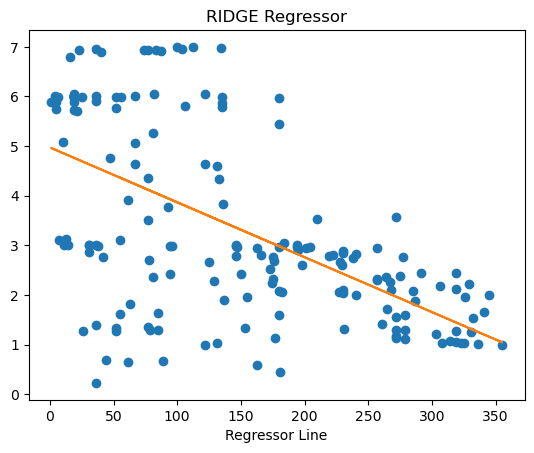

In [251]:
res=pd.DataFrame()
res['Actual']=y1_test
res['Predict']=rfc1.predict(x1_test)

print(res)

x=np.array(y1_test)
y=np.array(rfc1.predict(x1_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('RIDGE Regressor')